### IMPORTING THE REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### READING THE DATASET

In [2]:
train=pd.read_csv('C:/Users/AMRITA/Downloads/train_oSwQCTC/train.csv')
test=pd.read_csv('C:/Users/AMRITA/Downloads/test_HujdGe7/test.csv')

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


### CHECKING THE DATA TYPE OF COLUMNS

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


### CHECKING FOR DUPLICATE ROWS

In [6]:
train.duplicated().sum()

0

### CHECKING FOR MISSING VALUES COLUMN WISE

In [7]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

__So We will drop Product_Category_3 from the dataset__

In [8]:
train.drop(columns=['Product_Category_2','Product_Category_3'],inplace=True)
test.drop(columns=['Product_Category_2','Product_Category_3'],inplace=True)

### CHECKING THE VARIABLE TYPES

In [9]:
train.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Purchase                      18105
dtype: int64

__Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1 are  CATEGORICAL variables.__ 

__User_ID, Product_ID are  QUALITATIVE variables.__

__Purchase is  CONTINUOUS variables.__              

In [10]:
train.drop(columns=['Product_ID','User_ID'],inplace=True)
test.drop(columns=['Product_ID','User_ID'],inplace=True)

__Since they are qualitative variables, they cannot be utilized to predict the purchase so we transformed them into numeric.__

In [11]:
train

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,F,0-17,10,A,2,0,3,8370
1,F,0-17,10,A,2,0,1,15200
2,F,0-17,10,A,2,0,12,1422
3,F,0-17,10,A,2,0,12,1057
4,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,368
550064,F,26-35,1,C,3,0,20,371
550065,F,26-35,15,B,4+,1,20,137
550066,F,55+,1,C,2,0,20,365


### VISUALIZING THE DISTRIBUTION OF THE VARIABLES

#### TARGET VARIABLE:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020204D99B48>]],
      dtype=object)

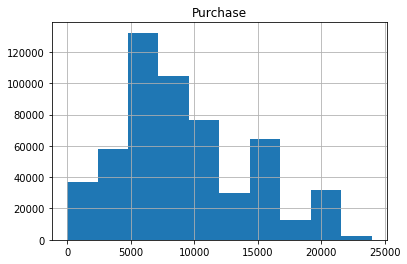

In [12]:
train.hist('Purchase')

__The target variable is slightly skewed to the right. Predictive modeling can be attempted for this variable.__

#### INDEPENDENT VARIABLES

In [13]:
def bar_graph(data,predictor):
    grouped=data.groupby(predictor)
    chart=grouped.size().plot.bar(rot=0, title='Bar Chart showing the size of different '+str(predictor))
    chart.set_xlabel(predictor)

In [14]:
train.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

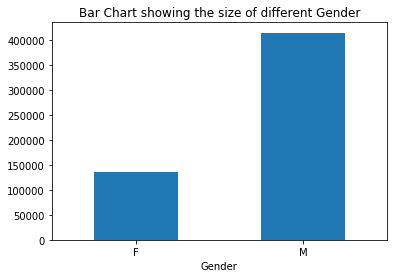

In [15]:
bar_graph(train,'Gender')

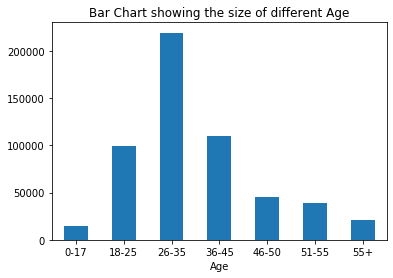

In [16]:
bar_graph(train,'Age')

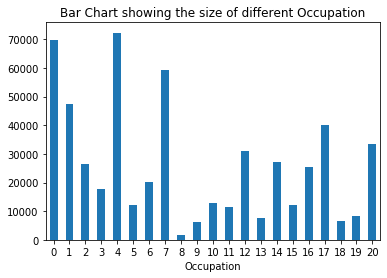

In [17]:
bar_graph(train,'Occupation')

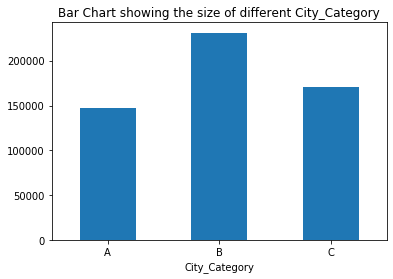

In [18]:
bar_graph(train,'City_Category')

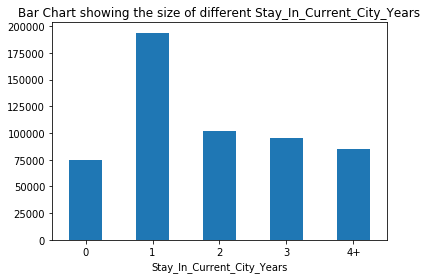

In [19]:
bar_graph(train,'Stay_In_Current_City_Years')

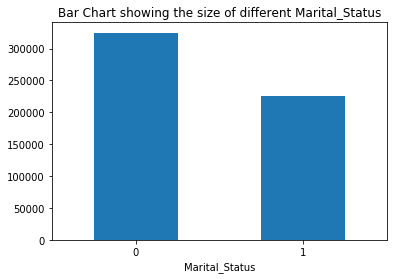

In [20]:
bar_graph(train,'Marital_Status')

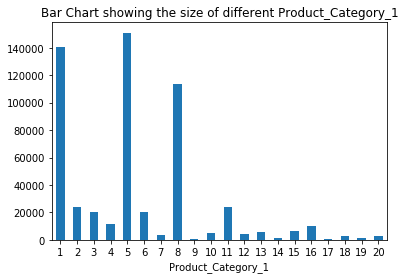

In [21]:
bar_graph(train,'Product_Category_1')

__All the predictors have fairly distributed data points amongst its classes.__

### ANALYZING THE RELATIONSHIP BETWEEN THE PREDICTORS AND TARGET VARIABLE ALONGWITH OUTLIER TREATMENT

#### USER DEFINED FUNCTIONS:

#### 1) ANOVA TEST 
#### 2) BAR CHART FOR THE MEAN PURCHASE AMONGST THE CLASSES OF THE PREDICTORS

In [22]:
def anova_test(data,target,predictor):
    data1=data.groupby(predictor)[target].apply(list)
    from scipy.stats import f_oneway
    AnovaResults = f_oneway(*data1)
    if AnovaResults[1]<0.05:
        print(str(predictor)+' is related with the target variable : ', AnovaResults[1])
    else:
        print(str(predictor)+' is NOT related with the target variable : ', AnovaResults[1])
  

In [23]:
def barplotting(data,target,variable):
    variables=list(data[variable].unique())
    import matplotlib.pyplot as plt
    data1=data.groupby(variable)
    data=data1.mean()
    plt.bar(x=variables,height=list(data[target]))
    plt.title('Bar chart of mean '+ str(target) +' for different '+str(variable) )
    plt.xlabel(variable)
    plt.ylabel(target)  

__IF THE HEIGHT OF THE BARS IN A BARCHART ARE SAME, THEN THE PREDICTOR IS NOT CORRELATED WITH THE TARGET VARIABLE.__

In [24]:
anova_test(train,'Purchase','Gender')

Gender is related with the target variable :  0.0


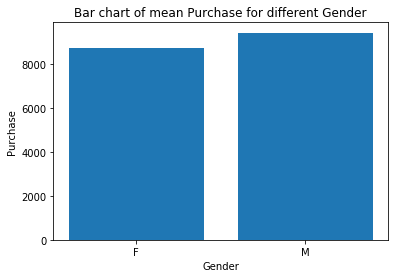

In [25]:
barplotting(train,'Purchase','Gender')

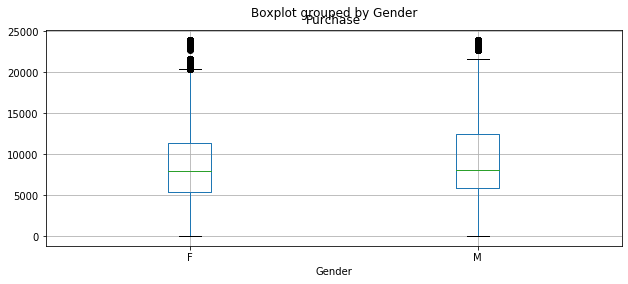

In [26]:
train.boxplot(column='Purchase', by='Gender', figsize=(10,4))

In [27]:
anova_test(train,'Purchase','Age')

Age is related with the target variable :  1.053563939251671e-49


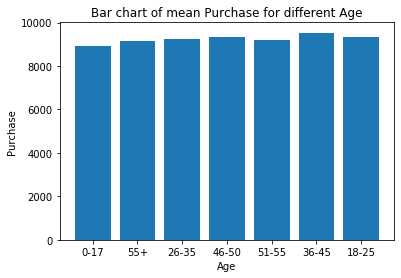

In [28]:
barplotting(train,'Purchase','Age')

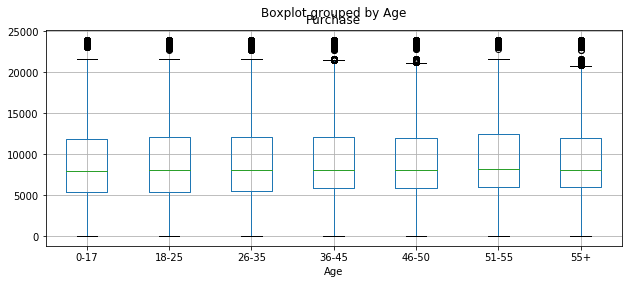

In [29]:
train.boxplot(column='Purchase', by='Age', figsize=(10,4))

In [30]:
anova_test(train,'Purchase','Marital_Status')

Marital_Status is NOT related with the target variable :  0.7310947526475329


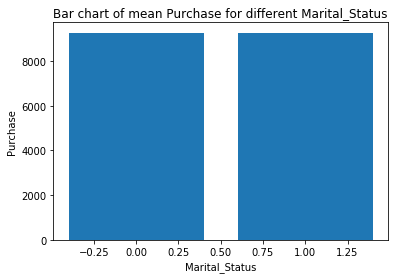

In [31]:
barplotting(train,'Purchase','Marital_Status')

In [32]:
anova_test(train,'Purchase','Occupation')

Occupation is related with the target variable :  0.0


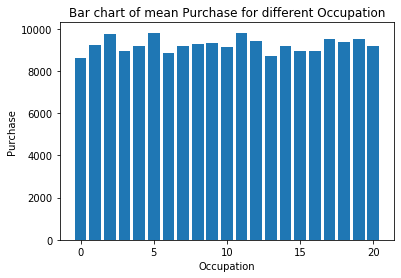

In [33]:
barplotting(train,'Purchase','Occupation')

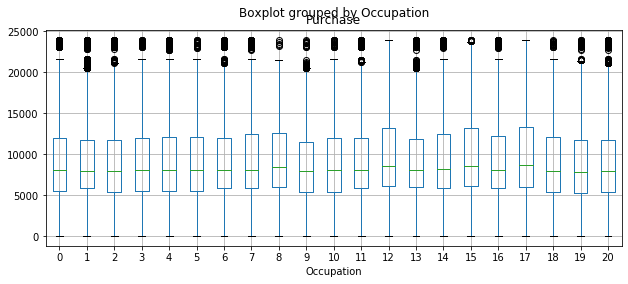

In [34]:
train.boxplot(column='Purchase', by='Occupation', figsize=(10,4))

In [35]:
anova_test(train,'Purchase','City_Category')

City_Category is related with the target variable :  0.0


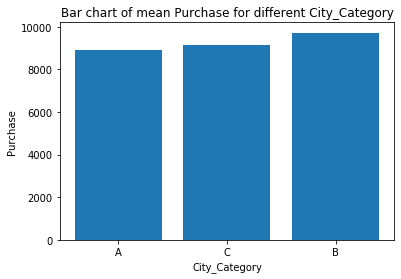

In [36]:
barplotting(train,'Purchase','City_Category')

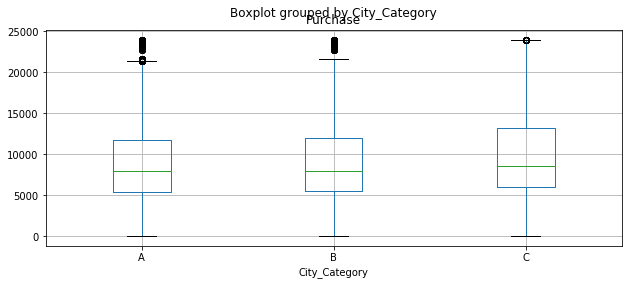

In [37]:
train.boxplot(column='Purchase', by='City_Category', figsize=(10,4))

In [38]:
anova_test(train,'Purchase','Stay_In_Current_City_Years')

Stay_In_Current_City_Years is related with the target variable :  1.4011435777855407e-07


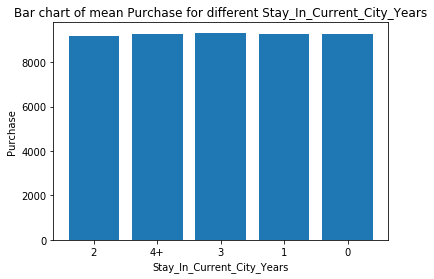

In [39]:
barplotting(train,'Purchase','Stay_In_Current_City_Years')

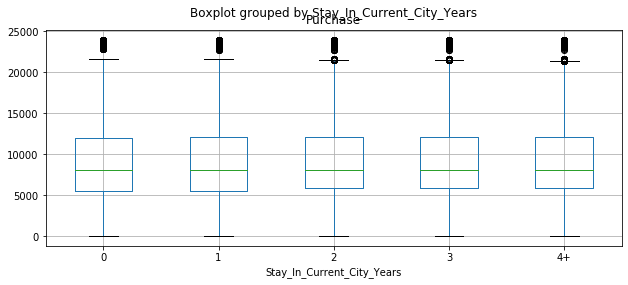

In [40]:
train.boxplot(column='Purchase', by='Stay_In_Current_City_Years', figsize=(10,4))

In [41]:
anova_test(train,'Purchase','Product_Category_1')

Product_Category_1 is related with the target variable :  0.0


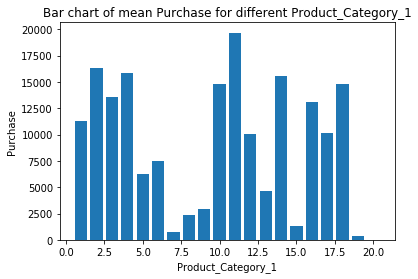

In [42]:
barplotting(train,'Purchase','Product_Category_1')

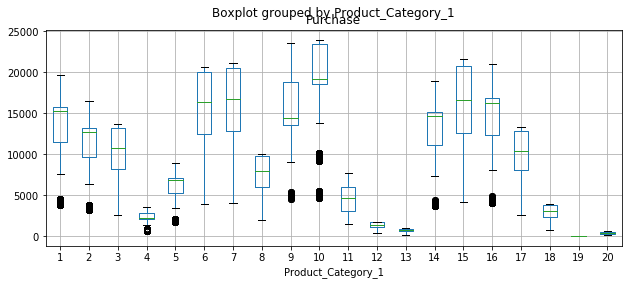

In [43]:
train.boxplot(column='Purchase', by='Product_Category_1', figsize=(10,4))

__FROM ALL THE BOXPLOTS, WE COULD CONCLUDE THAT NONE OF PREDICTORS HAVE ANY OUTLIER IS RELATION TO THE PURCHASE AMOUNT.__

__SINCE MARITAL STATUS IS NOT CORRELATED WITH THE PURCHASE, WE WILL REMOVE IT FROM THE DATASET.__

In [44]:
train.drop(columns='Marital_Status',inplace=True)

### TREATING CATEGORICAL VARIABLES

STRING ORDINAL VARIABLES: Age,  Stay_In_Current_City_Years

STRING NOMINAL VARIABLES: Gender,  City Category

#### ORDINAL

In [45]:
train.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [46]:
train['Age'].replace({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7},inplace=True)
test['Age'].replace({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7},inplace=True)

In [47]:
train.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [48]:
train['Stay_In_Current_City_Years'].replace({'0':1,'1':2, '2':3,'3':4,'4+':5},inplace=True)
test['Stay_In_Current_City_Years'].replace({'0':1,'1':2, '2':3,'3':4,'4+':5},inplace=True)

#### NOMINAL

In [49]:
train.Gender.unique()

array(['F', 'M'], dtype=object)

In [50]:
train['Gender'].replace({'F':0, 'M':1},inplace=True)
test['Gender'].replace({'F':0, 'M':1},inplace=True)

In [51]:
train=pd.get_dummies(train)
test= pd.get_dummies(test)

In [52]:
train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Purchase,City_Category_A,City_Category_B,City_Category_C
0,0,1,10,3,3,8370,1,0,0
1,0,1,10,3,1,15200,1,0,0
2,0,1,10,3,12,1422,1,0,0
3,0,1,10,3,12,1057,1,0,0
4,1,7,16,5,8,7969,0,0,1


### SPLITTING THE DATASET

In [87]:
Predictor=['Gender', 'Age', 'Occupation', 'City_Category_A','City_Category_B','City_Category_C','Stay_In_Current_City_Years', 'Product_Category_1']
TargetVariable='Purchase'
x = train[Predictor].values
y = train[TargetVariable].values

x_testing =test[Predictor].values

In [88]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(412551, 8) (137517, 8) (412551,) (137517,)


### APPLYING DIFFERENT ALGORITHMS

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

### ACCURACY MEASURE

In [56]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


### MODELS

#### LINEAR REGRESSION

In [57]:
lr=LinearRegression()
lr.fit(x_train, y_train)
train_prediction= lr.predict(x_train)
test_prediction=lr.predict(x_test)

print('The value of slope is: ',lr.coef_)
print('The value of Intercept is: ',lr.intercept_)
print('r-squared for training data:',r2_score(train_prediction , y_train))
print('r-squared for testing data:',r2_score(test_prediction , y_test))
print('Root Mean Squared Error:',sqrt(mean_squared_error(y_test,test_prediction)))

The value of slope is:  [ 5.12187863e+02  1.07659665e+02  6.41281582e+00 -2.50072920e+13
 -2.50072920e+13 -2.50072920e+13  7.97495152e+00 -4.38410554e+02]
The value of Intercept is:  25007291965549.69
r-squared for training data: -5.989791202227621
r-squared for testing data: -5.971916378715369
Root Mean Squared Error: 4695.853726038594


#### DECISION TREE

In [58]:
RegModel = DecisionTreeRegressor(max_depth=3,criterion='mse')
DT=RegModel.fit(x_train,y_train)
train_prediction= DT.predict(x_train)
test_prediction= DT.predict(x_test)

print('r-squared for training data:',r2_score(train_prediction , y_train))
print('r-squared for testing data:',r2_score(test_prediction , y_test))
print('Root Mean Squared Error:',sqrt(mean_squared_error(y_test,test_prediction)))

r-squared for training data: -0.25804911366438454
r-squared for testing data: -0.2664183876772843
Root Mean Squared Error: 3761.011129753404


#### RANDOM FOREST

In [59]:
RegModel = RandomForestRegressor(max_depth=2, n_estimators=100,criterion='mse')
RF=RegModel.fit(x_train,y_train)
train_prediction= RF.predict(x_train)
test_prediction= RF.predict(x_test)

print('r-squared for training data:',r2_score(train_prediction , y_train))
print('r-squared for testing data:',r2_score(test_prediction , y_test))
print('Root Mean Squared Error:',sqrt(mean_squared_error(y_test,test_prediction)))

r-squared for training data: -1.2077478009252123
r-squared for testing data: -1.2063321534326068
Root Mean Squared Error: 4168.605796636985


#### ADABoost

In [60]:
DTR=DecisionTreeRegressor(max_depth=1)
RegModel = AdaBoostRegressor(n_estimators=500, base_estimator=DTR ,learning_rate=0.7)
AB=RegModel.fit(x_train,y_train)
train_prediction=AB.predict(x_train)
test_prediction=AB.predict(x_test)

print('r-squared for training data:',r2_score(train_prediction , y_train))
print('r-squared for testing data:',r2_score(test_prediction , y_test))
print('Root Mean Squared Error:',sqrt(mean_squared_error(y_test,test_prediction)))

r-squared for training data: -2.370407073527145
r-squared for testing data: -2.364731466372999
Root Mean Squared Error: 4307.702969347555


#### XGBoost

In [61]:
RegModel=XGBRegressor(max_depth=2, learning_rate=0.1, n_estimators=1000, objective='reg:linear', booster='gbtree')
XGB=RegModel.fit(x_train,y_train)
train_prediction= XGB.predict(x_train)
test_prediction= XGB.predict(x_test)

print('r-squared for training data:',r2_score(train_prediction , y_train))
print('r-squared for testing data:',r2_score(test_prediction , y_test))
print('Root Mean Squared Error:',sqrt(mean_squared_error(y_test,test_prediction)))

[12:02:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:04:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
r-squared for training data: 0.4455464442885959
r-squared for testing data: 0.43702791145240405
Root Mean Squared Error: 3019.1342993815333


In [90]:
model=CatBoostRegressor(iterations=50,depth=3,learning_rate=0.1,loss_function='RMSE')
cat=model.fit(x_train,y_train)
train_prediction= cat.predict(x_train)
test_prediction= cat.predict(x_test)

print('r-squared for training data:',r2_score(train_prediction , y_train))
print('r-squared for testing data:',r2_score(test_prediction , y_test))
print('Root Mean Squared Error:',sqrt(mean_squared_error(y_test,test_prediction)))

0:	learn: 4825.7104205	total: 224ms	remaining: 11s
1:	learn: 4650.2348088	total: 308ms	remaining: 7.39s
2:	learn: 4503.0882081	total: 393ms	remaining: 6.16s
3:	learn: 4377.9880821	total: 468ms	remaining: 5.38s
4:	learn: 4267.5090832	total: 528ms	remaining: 4.75s
5:	learn: 4171.4698606	total: 581ms	remaining: 4.26s
6:	learn: 4083.5894151	total: 634ms	remaining: 3.9s
7:	learn: 4024.2240491	total: 694ms	remaining: 3.64s
8:	learn: 3958.4949015	total: 759ms	remaining: 3.46s
9:	learn: 3897.3506813	total: 815ms	remaining: 3.26s
10:	learn: 3846.2361541	total: 867ms	remaining: 3.07s
11:	learn: 3804.3283667	total: 940ms	remaining: 2.98s
12:	learn: 3771.6195614	total: 1s	remaining: 2.85s
13:	learn: 3716.7154779	total: 1.05s	remaining: 2.7s
14:	learn: 3692.9744535	total: 1.11s	remaining: 2.58s
15:	learn: 3655.6754105	total: 1.17s	remaining: 2.48s
16:	learn: 3622.6776919	total: 1.22s	remaining: 2.37s
17:	learn: 3595.7269371	total: 1.27s	remaining: 2.26s
18:	learn: 3562.6908321	total: 1.32s	remainin

### NORMALIZED DATA

In [91]:
from sklearn.preprocessing import MinMaxScaler
PredictorScaler=MinMaxScaler()
TargetVarScaler=MinMaxScaler()

# Storing the fit object for later reference
Predictor=['Gender', 'Age', 'Occupation', 'City_Category_A','City_Category_B','City_Category_C','Stay_In_Current_City_Years', 'Product_Category_1']
TargetVariable=['Purchase']
x = train[Predictor].values
y = train[TargetVariable].values

PredictorScalerFit=PredictorScaler.fit(x)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
x_normal=PredictorScalerFit.transform(x)
y_normal=TargetVarScalerFit.transform(y)


# Split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_normal, y_normal, test_size=0.25, random_state=42)

#### LINEAR REGRESSION (NORMALIZED)

In [63]:
lr=LinearRegression()
lr.fit(x_train, y_train)
train_prediction= lr.predict(x_train)
test_prediction=lr.predict(x_test)

print('The value of slope is: ',lr.coef_)
print('The value of Intercept is: ',lr.intercept_)
print('r-squared for training data:',r2_score(train_prediction , y_train))
print('r-squared for testing data:',r2_score(test_prediction , y_test))
print('Root Mean Squared Error:',sqrt(mean_squared_error(y_test,test_prediction)))

The value of slope is:  [[ 2.13858702e-02  2.69844505e-02  5.35640327e-03 -4.81032761e+08
  -4.81032761e+08 -4.81032761e+08  1.33169237e-03 -3.47813430e-01]]
The value of Intercept is:  [4.81032762e+08]
r-squared for training data: -5.990345366458807
r-squared for testing data: -5.972466790307452
Root Mean Squared Error: 0.1960772286684898


#### DECISION TREE (NORMALIZED)

In [64]:
RegModel = DecisionTreeRegressor(max_depth=3,criterion='mse')
DT=RegModel.fit(x_train,y_train)
train_prediction= DT.predict(x_train)
test_prediction= DT.predict(x_test)

print('r-squared for training data:',r2_score(train_prediction , y_train))
print('r-squared for testing data:',r2_score(test_prediction , y_test))
print('Root Mean Squared Error:',sqrt(mean_squared_error(y_test,test_prediction)))

r-squared for training data: -0.25804911366440897
r-squared for testing data: -0.2664183876773092
Root Mean Squared Error: 0.15704251241193384


#### RANDOM FOREST (NORMALIZED)

In [65]:
RegModel = RandomForestRegressor(max_depth=2, n_estimators=100,criterion='mse')
RF=RegModel.fit(x_train,y_train)
train_prediction= RF.predict(x_train)
test_prediction= RF.predict(x_test)

print('r-squared for training data:',r2_score(train_prediction , y_train))
print('r-squared for testing data:',r2_score(test_prediction , y_test))
print('Root Mean Squared Error:',sqrt(mean_squared_error(y_test,test_prediction)))

C:\Users\AMRITA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


r-squared for training data: -1.209230698246607
r-squared for testing data: -1.2078092583728663
Root Mean Squared Error: 0.17406162095548638


#### ADA BOOST (NORMALIZED)

In [66]:
DTR=DecisionTreeRegressor(max_depth=1)
RegModel = AdaBoostRegressor(n_estimators=500, base_estimator=DTR ,learning_rate=0.7)
AB=RegModel.fit(x_train,y_train)
train_prediction=AB.predict(x_train)
test_prediction=AB.predict(x_test)

print('r-squared for training data:',r2_score(train_prediction , y_train))
print('r-squared for testing data:',r2_score(test_prediction , y_test))
print('Root Mean Squared Error:',sqrt(mean_squared_error(y_test,test_prediction)))

C:\Users\AMRITA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r-squared for training data: -2.3627503919454087
r-squared for testing data: -2.3571236500564883
Root Mean Squared Error: 0.17986307601337576


#### XG Boost (NORMALIZED)

In [67]:
RegModel=XGBRegressor(max_depth=2, learning_rate=0.1, n_estimators=1000, objective='reg:linear', booster='gbtree')
XGB=RegModel.fit(x_train,y_train)
train_prediction= XGB.predict(x_train)
test_prediction= XGB.predict(x_test)

print('r-squared for training data:',r2_score(train_prediction , y_train))
print('r-squared for testing data:',r2_score(test_prediction , y_test))
print('Root Mean Squared Error:',sqrt(mean_squared_error(y_test,test_prediction)))

[12:05:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
r-squared for training data: 0.44544028203134356
r-squared for testing data: 0.43693480644492044
Root Mean Squared Error: 0.12608154156882043


In [92]:
model=CatBoostRegressor(iterations=50,depth=3,learning_rate=0.1,loss_function='RMSE')
cat=model.fit(x_train,y_train)
train_prediction= cat.predict(x_train)
test_prediction= cat.predict(x_test)

print('r-squared for training data:',r2_score(train_prediction , y_train))
print('r-squared for testing data:',r2_score(test_prediction , y_test))
print('Root Mean Squared Error:',sqrt(mean_squared_error(y_test,test_prediction)))

0:	learn: 0.2014995	total: 61.3ms	remaining: 3s
1:	learn: 0.1941724	total: 117ms	remaining: 2.81s
2:	learn: 0.1880282	total: 170ms	remaining: 2.67s
3:	learn: 0.1828046	total: 219ms	remaining: 2.52s
4:	learn: 0.1781915	total: 279ms	remaining: 2.51s
5:	learn: 0.1741814	total: 342ms	remaining: 2.51s
6:	learn: 0.1705119	total: 393ms	remaining: 2.41s
7:	learn: 0.1680331	total: 446ms	remaining: 2.34s
8:	learn: 0.1652885	total: 501ms	remaining: 2.28s
9:	learn: 0.1627354	total: 562ms	remaining: 2.25s
10:	learn: 0.1606011	total: 622ms	remaining: 2.21s
11:	learn: 0.1588512	total: 675ms	remaining: 2.14s
12:	learn: 0.1574855	total: 736ms	remaining: 2.1s
13:	learn: 0.1551929	total: 795ms	remaining: 2.04s
14:	learn: 0.1542016	total: 848ms	remaining: 1.98s
15:	learn: 0.1526442	total: 900ms	remaining: 1.91s
16:	learn: 0.1512663	total: 973ms	remaining: 1.89s
17:	learn: 0.1501410	total: 1.03s	remaining: 1.83s
18:	learn: 0.1487616	total: 1.09s	remaining: 1.77s
19:	learn: 0.1475655	total: 1.15s	remaining:

### STANDARDIZED DATA

In [93]:
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
Predictor=['Gender', 'Age', 'Occupation', 'City_Category_A','City_Category_B','City_Category_C','Stay_In_Current_City_Years', 'Product_Category_1']
TargetVariable=['Purchase']
x = train[Predictor].values
y = train[TargetVariable].values
x_testing =test[Predictor].values
PredictorScalerFit=PredictorScaler.fit(x)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
x_standard=PredictorScalerFit.transform(x)
y_standard=TargetVarScalerFit.transform(y)


# Split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_standard, y_standard, test_size=0.25, random_state=42)


#### LINEAR REGRESSION (STANDARDIZED)

In [69]:
lr=LinearRegression()
lr.fit(x_train, y_train)
train_prediction= lr.predict(x_train)
test_prediction=lr.predict(x_test)

print('The value of slope is: ',lr.coef_)
print('The value of Intercept is: ',lr.intercept_)
print('r-squared for training data:',r2_score(train_prediction , y_train))
print('r-squared for testing data:',r2_score(test_prediction , y_test))
print('Root Mean Squared Error:',sqrt(mean_squared_error(y_test,test_prediction)))

The value of slope is:  [[ 4.39640827e-02  2.89231808e-02  8.30050635e-03 -1.08647548e+10
  -1.21001782e+10 -1.13495284e+10  2.04772446e-03 -3.43545321e-01]]
The value of Intercept is:  [-0.00021696]
r-squared for training data: -5.983247509592311
r-squared for testing data: -5.965617985240481
Root Mean Squared Error: 0.9348635416514173


#### DECISION TREE (STANDARDIZED)

In [70]:
RegModel = DecisionTreeRegressor(max_depth=3,criterion='mse')
DT=RegModel.fit(x_train,y_train)
train_prediction= DT.predict(x_train)
test_prediction= DT.predict(x_test)

print('r-squared for training data:',r2_score(train_prediction , y_train))
print('r-squared for testing data:',r2_score(test_prediction , y_test))
print('Root Mean Squared Error:',sqrt(mean_squared_error(y_test,test_prediction)))

r-squared for training data: -0.2580491136643943
r-squared for testing data: -0.2664183876772941
Root Mean Squared Error: 0.7487488721654413


#### RANDOM FOREST (STANDARDIZED)

In [71]:
RegModel = RandomForestRegressor(max_depth=2, n_estimators=100,criterion='mse')
RF=RegModel.fit(x_train,y_train)
train_prediction= RF.predict(x_train)
test_prediction= RF.predict(x_test)

print('r-squared for training data:',r2_score(train_prediction , y_train))
print('r-squared for testing data:',r2_score(test_prediction , y_test))
print('Root Mean Squared Error:',sqrt(mean_squared_error(y_test,test_prediction)))

C:\Users\AMRITA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


r-squared for training data: -1.2086058880674106
r-squared for testing data: -1.2071894529180232
Root Mean Squared Error: 0.829893250114392


#### ADABoost (STANDARDIZED)

In [72]:
DTR=DecisionTreeRegressor(max_depth=1)
RegModel = AdaBoostRegressor(n_estimators=500, base_estimator=DTR ,learning_rate=0.7)
AB=RegModel.fit(x_train,y_train)
train_prediction=AB.predict(x_train)
test_prediction=AB.predict(x_test)

print('r-squared for training data:',r2_score(train_prediction , y_train))
print('r-squared for testing data:',r2_score(test_prediction , y_test))
print('Root Mean Squared Error:',sqrt(mean_squared_error(y_test,test_prediction)))

C:\Users\AMRITA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r-squared for training data: -2.3561623096364386
r-squared for testing data: -2.3505408844888787
Root Mean Squared Error: 0.8575361803391282


#### XGBoost (STANDARDIZED)

In [73]:
RegModel=XGBRegressor(max_depth=2, learning_rate=0.1, n_estimators=1000, objective='reg:linear', booster='gbtree')
XGB=RegModel.fit(x_train,y_train)
train_prediction= XGB.predict(x_train)
test_prediction= XGB.predict(x_test)

print('r-squared for training data:',r2_score(train_prediction , y_train))
print('r-squared for testing data:',r2_score(test_prediction , y_test))
print('Root Mean Squared Error:',sqrt(mean_squared_error(y_test,test_prediction)))

[12:09:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:11:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
r-squared for training data: 0.4455865708678105
r-squared for testing data: 0.43704782437279377
Root Mean Squared Error: 0.6011714168107726


In [94]:
model=CatBoostRegressor(iterations=50,depth=3,learning_rate=0.1,loss_function='RMSE')
cat=model.fit(x_train,y_train)
train_prediction= cat.predict(x_train)
test_prediction= cat.predict(x_test)

print('r-squared for training data:',r2_score(train_prediction , y_train))
print('r-squared for testing data:',r2_score(test_prediction , y_test))
print('Root Mean Squared Error:',sqrt(mean_squared_error(y_test,test_prediction)))

0:	learn: 0.9607111	total: 60.6ms	remaining: 2.97s
1:	learn: 0.9257771	total: 114ms	remaining: 2.74s
2:	learn: 0.8964829	total: 167ms	remaining: 2.61s
3:	learn: 0.8715778	total: 216ms	remaining: 2.48s
4:	learn: 0.8495834	total: 275ms	remaining: 2.48s
5:	learn: 0.8304637	total: 335ms	remaining: 2.46s
6:	learn: 0.8129683	total: 384ms	remaining: 2.36s
7:	learn: 0.8011498	total: 436ms	remaining: 2.29s
8:	learn: 0.7880643	total: 485ms	remaining: 2.21s
9:	learn: 0.7758916	total: 551ms	remaining: 2.2s
10:	learn: 0.7657156	total: 604ms	remaining: 2.14s
11:	learn: 0.7573725	total: 654ms	remaining: 2.07s
12:	learn: 0.7508608	total: 713ms	remaining: 2.03s
13:	learn: 0.7399304	total: 772ms	remaining: 1.98s
14:	learn: 0.7352040	total: 823ms	remaining: 1.92s
15:	learn: 0.7277784	total: 874ms	remaining: 1.86s
16:	learn: 0.7212092	total: 928ms	remaining: 1.8s
17:	learn: 0.7158438	total: 1s	remaining: 1.78s
18:	learn: 0.7092669	total: 1.05s	remaining: 1.72s
19:	learn: 0.7035645	total: 1.1s	remaining: 1

__XGBoost on normalized data gave the best results.__

### NORMALIZING THE  TEST DATA

In [95]:
from sklearn.preprocessing import MinMaxScaler
PredictorScaler=MinMaxScaler()
TargetVarScaler=MinMaxScaler()

# Storing the fit object for later reference
Predictor=['Gender', 'Age', 'Occupation', 'City_Category_A','City_Category_B','City_Category_C','Stay_In_Current_City_Years', 'Product_Category_1']
TargetVariable=['Purchase']
x = train[Predictor].values
y = train[TargetVariable].values
x_testing =test[Predictor].values

PredictorScalerFit=PredictorScaler.fit(x)
TargetVarScalerFit=TargetVarScaler.fit(y)
PredictorTesting=PredictorScaler.fit(x_testing)

# Generating the standardized values of X and y
x_normal=PredictorScalerFit.transform(x)
y_normal=TargetVarScalerFit.transform(y)
x_normal_testing=PredictorTesting.transform(x_testing)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_normal, y_normal, test_size=0.3, random_state=42)


In [75]:
RegModel=XGBRegressor(max_depth=2, learning_rate=0.1, n_estimators=1000, objective='reg:linear', booster='gbtree')
XGB=RegModel.fit(x_train,y_train)
testing_prediction= XGB.predict(x_normal_testing)

[12:11:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:13:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [97]:
#testing_prediction= testing_prediction.reshape(testing_prediction.shape[0],-1)
testing_prediction= testing_prediction.reshape(-1,1)
testing_prediction= TargetVarScalerFit.inverse_transform(testing_prediction)

In [98]:
testing_prediction

array([[13284.37427468],
       [ 9999.59632033],
       [ 6431.20902097],
       ...,
       [13284.37427468],
       [12825.05362682],
       [ 4029.57813878]])

### SAVING THE PURCHASE PREDICTIONS 

In [99]:
test2 =pd.read_csv('C:/Users/AMRITA/Downloads/test_HujdGe7/test.csv')

In [100]:
test2.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [101]:
test2.drop(columns=['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],inplace=True)

In [102]:
test2['Purchase']=testing_prediction

In [103]:
test2= test2[['Purchase','User_ID','Product_ID']]
test2.to_csv('Submission_Analytics.csv',index=False)